<a href="https://colab.research.google.com/github/ketkiambekar/face-recognition/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition in images**

**Face Identification:** Spotting a human face in an image. <br>
**Face Recognition:** Determining which individual the face belongs to. 

In this project: we use the image recognition functionality in the 'face-recognition' python library.

**Steps:** <br>
1) Capture the face encodings of Known images. <br>
2) Capture the face encodings of the Unknown images. <br>
3) Compare the two and see if known image encodings are present in the images with unknown faces.


**Instructions for running** <br>
1) Upload the images.zip to in the files section in the leftmost pane. <br>
2) Run all cells by clicking "Runtime >> Run" all from the file menu.

In [1]:
#Install library
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=4ff2d3f64f25167d9052a6c0d79ee56ce62d4c6736aefb407133048a125b98c7
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
#Library imports
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
!unzip images.zip

In [6]:
#Set Parameters
KNOWN_FACES_DIR = "known_faces"
UNKNOWN_FACES_DIR ="unknown_faces"
TOLERANCE =0.6
FRAME_THICKNESS = 3
FONT_THICKNESS= 2
FONT = cv2.FONT_HERSHEY_SIMPLEX
MODEL ="cnn" #hog or cnn 
known_faces=[]
known_names=[]
showImages=[]
facial_features_list=[]

Read and Process Known Faces

In [9]:
#Reading known faces from known faces folders
for name in os.listdir(KNOWN_FACES_DIR):

  if not name.startswith('.'):
    # Next we load every file of faces of known person
    for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):

      # Load an image
      if not filename.startswith('.'):
        image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')

      # Face encoding captures 128 points on the face and stores them in array
      # Always returns a list of found faces, for this purpose we take first face only (assuming one face per image as you can't be twice on one image)
      encoding = face_recognition.face_encodings(image)[0]

      # Append encodings and name
      known_faces.append(encoding)
      known_names.append(name)

Read and Process Unknown Faces

In [10]:
# Returns (R, G, B) from name for unique border color for an individual
def name_to_color(name):
  # Take 3 first letters, tolower()
  # lowercased character ord() value rage is 97 to 122, substract 97, multiply by 8
  color = [(ord(c.lower())-97)*8 for c in name[:3]]
  return color

In [11]:
def resize(image,window_height = 500):
    aspect_ratio = float(image.shape[1])/float(image.shape[0])
    window_width = window_height/aspect_ratio
    image = cv2.resize(image, (int(window_height),int(window_width)))
    return image

In [30]:
showImages=[]
# Now let's loop over a folder of faces we want to label
for filename in os.listdir(UNKNOWN_FACES_DIR):

  # Load image
  print(f'\nFilename {filename}', end='')
  if not filename.startswith('.'):
    image = face_recognition.load_image_file(f'{UNKNOWN_FACES_DIR}/{filename}')

  image = resize(image, 700)

  # Face Locations returns coordinates of points where the face is located in the image. 
  locations = face_recognition.face_locations(image, model=MODEL)

  # Now since we know locations, we can pass them to face_encodings as second argument
  # Without that it will search for faces once again slowing down whole process
  encodings = face_recognition.face_encodings(image, locations)

  # We passed our image through face_locations and face_encodings, so we can modify it
  # First we need to convert it from RGB to BGR because BGR is the standard color model used in cv2 for historical reasons
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  #Count the number of faces in the image
  print(f"\nThere are {len(encodings)}(s) faces in the image")

    #We now compare the new faces found to the known_faces        
  #It checks if the new unknown face matches any one of the three known faces images 
  for face_encoding, face_location in zip(encodings, locations):

    # We use compare_faces (but might use face_distance as well)
    # Returns array of True/False values in order of passed known_faces

    results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
    print(results)

    # Since order is being preserved, we check if any face was found then grab index
    # then label (name) of first matching known face withing a tolerance
    match = None
    if True in results:  # If at least one is true, get a name of first of found labels
      match = known_names[results.index(True)]
      match = match.replace("_"," ")
      print(f' - {match} from {results}')

      # Each location contains positions in order: top, right, bottom, left
      top_left = (face_location[3], face_location[0])
      bottom_right = (face_location[1], face_location[2])

      # Get color by name using our fancy function
      color = name_to_color(match)

      # Paint frame
      cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)

      # Now we need smaller, filled frame below for a name
      # This time we use bottom in both corners - to start from bottom and move 50 pixels down
      top_left = (face_location[3], face_location[2])
      bottom_right = (face_location[1], face_location[2] + 22)

      # Paint frame
      cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)

      # Wite a name
      cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), FONT, 0.5, (200, 200, 200), FONT_THICKNESS)

      # Resize image 
      #image=cv2.resize(image, (int(image.shape[1]*0.8), int(image.shape[0]*0.8)))

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
  # Show image
  showImages.append(image)




Filename Elon2.jpg
There are 1(s) faces in the image
[False, False, False, False, False, False]

Filename OprahGroup.jpg
There are 16(s) faces in the image
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, True, True]
 - Oprah Winfrey from [False, False, False, False, True, True]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, True]
 - Oprah Winfrey from [False, False, False, False, False, True]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]

Filename dylan.jpeg
There are 

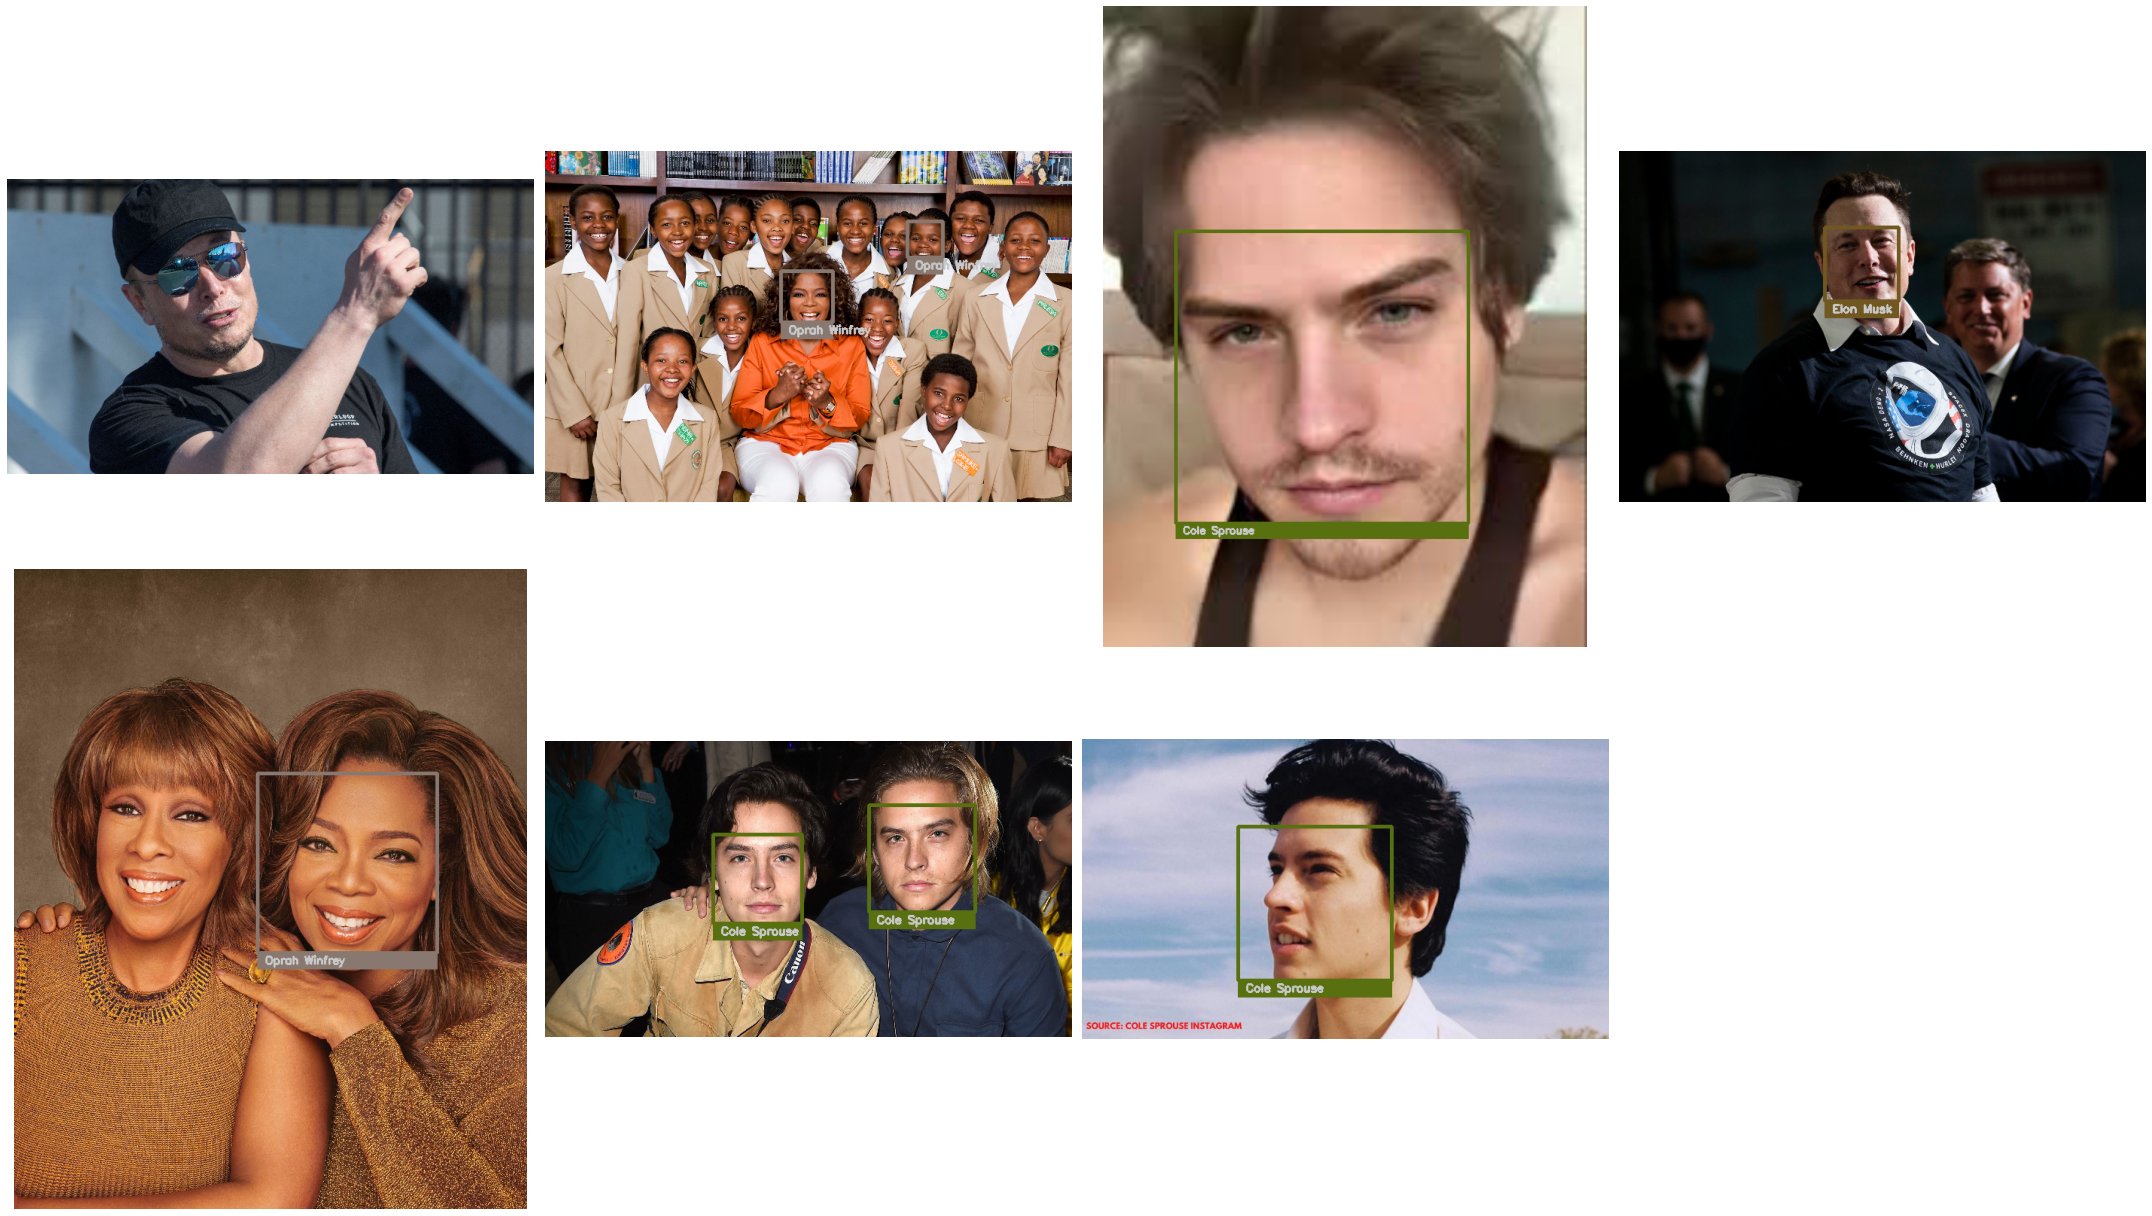

In [31]:
#Using Matplot lib for proper presentation of the images
from matplotlib import pyplot as plt

columns=4
rows= int(np.ceil(len(showImages)/columns))
fig, axs=plt.subplots(nrows=rows, ncols=columns, figsize=(30,17))

for i in range(rows*columns):
  if (i<len(showImages)):
    axs.flat[i].imshow(showImages[i])
  axs.flat[i].axis('off')

fig.tight_layout()
